In [1]:
import zadeh

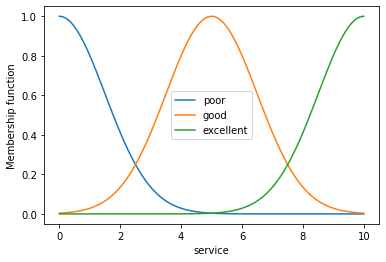

In [7]:
service = zadeh.FuzzyVariable(
    zadeh.FloatDomain("service", 0, 10, 100),
    {
        "poor": zadeh.GaussianFuzzySet(1.5, 0),
        "good": zadeh.GaussianFuzzySet(1.5, 5),
        "excellent": zadeh.GaussianFuzzySet(1.5, 10),
    },
)
service.plot()

In [11]:
rule_set = [
    ((service == "poor") | (food == "rancid")) >> (tip == "cheap"),
    (service == "good") >> (tip == "average"),
    ((service == "excellent") | (food == "delicious")) >> (tip == "generous"),
]


for rule in rule_set:
    print(rule)

NameError: name 'food' is not defined